In [9]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv("match_up_impact.csv.zip")

In [14]:
df

,Batter,Bowler,dismissed,match_played,runs_scored,ball_faced,average,strike_rate,batsman_impact
0,YBK Jaiswal,Mohammed Shami,0,3,23,18,23.0,127.778,0.942362
1,YBK Jaiswal,Yash Dayal,0,2,11,12,11.0,91.667,0.641669
2,YBK Jaiswal,Rashid Khan,0,2,13,9,13.0,144.444,0.984025
3,YBK Jaiswal,TA Boult,0,3,11,9,11.0,122.222,0.832637
4,YBK Jaiswal,R Ashwin,0,1,11,13,11.0,84.615,0.597594
...,...,...,...,...,...,...,...,...,...
24208,DS Lehmann,B Lee,0,1,4,3,4.0,133.333,0.858331
24209,DS Lehmann,JR Hopes,0,1,5,5,5.0,100.000,0.656250
24210,DS Lehmann,MF Maharoof,0,1,1,2,1.0,50.000,0.318750
24211,AA Noffke,AB Agarkar,0,1,2,8,2.0,25.000,0.168750


In [22]:
df.isnull().values.any()

False

In [24]:
print(df.head())

        Batter          Bowler  dismissed  match_played  runs_scored  \
0  YBK Jaiswal  Mohammed Shami          0             3           23   
1  YBK Jaiswal      Yash Dayal          0             2           11   
2  YBK Jaiswal     Rashid Khan          0             2           13   
3  YBK Jaiswal        TA Boult          0             3           11   
4  YBK Jaiswal        R Ashwin          0             1           11   

   ball_faced  average  strike_rate  batsman_impact  
0          18     23.0      127.778        0.942362  
1          12     11.0       91.667        0.641669  
2           9     13.0      144.444        0.984025  
3           9     11.0      122.222        0.832637  
4          13     11.0       84.615        0.597594  


In [25]:
print(df.describe())

          dismissed  match_played   runs_scored    ball_faced       average  \
count  24213.000000  24213.000000  24213.000000  24213.000000  24213.000000   
mean       0.005369      1.927147     11.604469      9.331929     11.572582   
std        0.099831      1.752668     15.010791     11.016807     14.925147   
min        0.000000      1.000000      0.000000      1.000000      0.000000   
25%        0.000000      1.000000      2.000000      3.000000      2.000000   
50%        0.000000      1.000000      7.000000      6.000000      7.000000   
75%        0.000000      2.000000     15.000000     11.000000     15.000000   
max        4.000000     20.000000    176.000000    134.000000    176.000000   

        strike_rate  batsman_impact  
count  24213.000000    24213.000000  
mean     116.022483        0.797469  
std       76.280048        0.516536  
min        0.000000        0.000000  
25%       66.667000        0.429169  
50%      100.000000        0.704606  
75%      152.000000   

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24213 entries, 0 to 24212
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Batter          24213 non-null  object 
 1   Bowler          24213 non-null  object 
 2   dismissed       24213 non-null  int64  
 3   match_played    24213 non-null  int64  
 4   runs_scored     24213 non-null  int64  
 5   ball_faced      24213 non-null  int64  
 6   average         24213 non-null  float64
 7   strike_rate     24213 non-null  float64
 8   batsman_impact  24213 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ MB
None


In [27]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Batter            0
Bowler            0
dismissed         0
match_played      0
runs_scored       0
ball_faced        0
average           0
strike_rate       0
batsman_impact    0
dtype: int64


In [ ]:
Performing an EDA

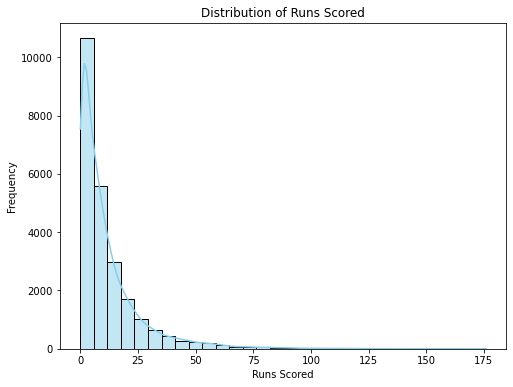

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of runs_scored using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['runs_scored'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()

C:\Users\SAKSHI PARATE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


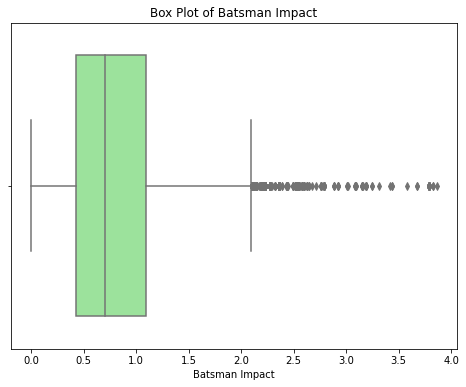

In [33]:
# Box plot for batsman_impact
plt.figure(figsize=(8, 6))
sns.boxplot(df['batsman_impact'], color='lightgreen')
plt.title('Box Plot of Batsman Impact')
plt.xlabel('Batsman Impact')
plt.show()

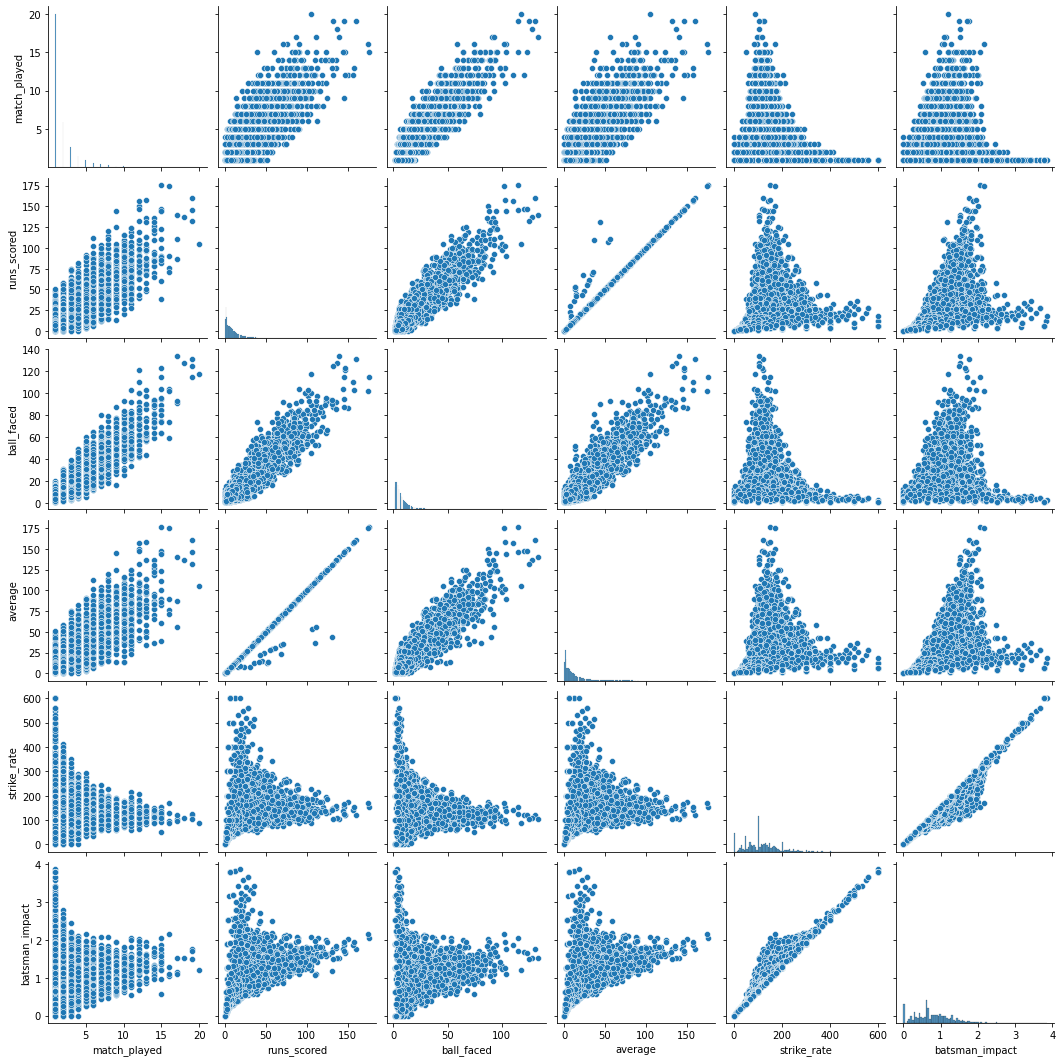

In [36]:
# Pairplot for numerical columns
sns.pairplot(df[['match_played', 'runs_scored', 'ball_faced', 'average', 'strike_rate', 'batsman_impact']])
plt.show()

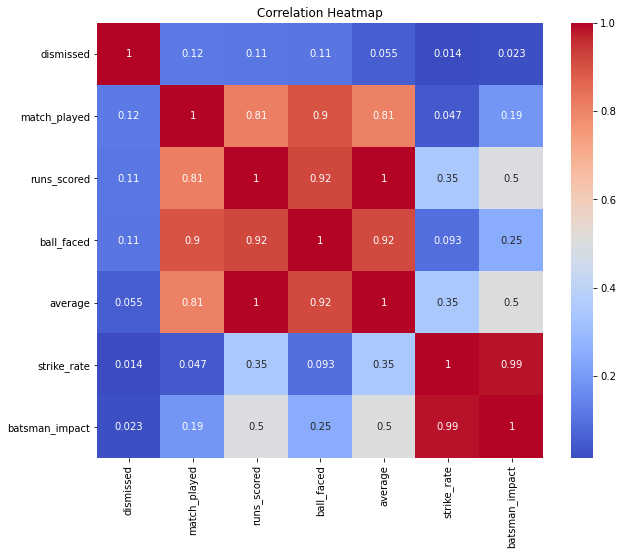

In [37]:
# Selecting only numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
Best performance of batters against bowlers

In [40]:
# Find Unique Batters
unique_batters = df['Batter'].unique()

# Iterate Through Unique Batters and Find Best Runs Scored
for batter in unique_batters:
    best_runs_record = df[df['Batter'] == batter].loc[df[df['Batter'] == batter]['runs_scored'].idxmax()]
    print("Best runs scored by", batter, "against", best_runs_record['Bowler'], "is", best_runs_record['runs_scored'])

Best runs scored by YBK Jaiswal against Sandeep Sharma is 53
Best runs scored by JC Buttler against Sandeep Sharma is 87
Best runs scored by SV Samson against S Kaul is 114
Best runs scored by D Padikkal against RD Chahar is 49
Best runs scored by SO Hetmyer against JO Holder is 47
Best runs scored by R Ashwin against SN Thakur is 22
Best runs scored by R Parag against HV Patel is 37
Best runs scored by TA Boult against Mohsin Khan is 13
Best runs scored by OC McCoy against R Sai Kishore is 7
Best runs scored by WP Saha against UT Yadav is 105
Best runs scored by Shubman Gill against R Ashwin is 72
Best runs scored by MS Wade against TA Boult is 21
Best runs scored by HH Pandya against R Ashwin is 57
Best runs scored by DA Miller against RA Jadeja is 108
Best runs scored by V Kohli against R Ashwin is 160
Best runs scored by F du Plessis against Mohammed Shami is 90
Best runs scored by RM Patidar against KH Pandya is 33
Best runs scored by GJ Maxwell against R Ashwin is 99
Best runs sc

Best runs scored by K Yadav against JJ Bumrah is 0
Best runs scored by PP Chawla against SR Watson is 22
Best runs scored by Mohammad Nabi against JJ Bumrah is 21
Best runs scored by Sachin Baby against Mustafizur Rahman is 23
Best runs scored by DJ Malan against I Sharma is 12
Best runs scored by Mohammed Shami against Avesh Khan is 12
Best runs scored by Virat Singh against KA Pollard is 6
Best runs scored by KL Nagarkoti against AS Rajpoot is 7
Best runs scored by Harbhajan Singh against DJ Bravo is 46
Best runs scored by Mujeeb Ur Rahman against Rashid Khan is 9
Best runs scored by JA Richardson against RA Jadeja is 7
Best runs scored by CR Woakes against Mustafizur Rahman is 12
Best runs scored by S Nadeem against SP Narine is 6
Best runs scored by BA Stokes against RA Jadeja is 44
Best runs scored by CA Lynn against YS Chahal is 87
Best runs scored by SP Goswami against R Bhatia is 35
Best runs scored by Gurkeerat Singh against R Ashwin is 39
Best runs scored by AT Carey against 

Best runs scored by CL White against RJ Harris is 42
Best runs scored by BB Samantray against KK Cooper is 28
Best runs scored by P Dogra against R Sathish is 22
Best runs scored by LJ Wright against UT Yadav is 27
Best runs scored by RV Gomez against WD Parnell is 13
Best runs scored by DPMD Jayawardene against RP Singh is 70
Best runs scored by B Chipli against Z Khan is 22
Best runs scored by BJ Rohrer against Azhar Mahmood is 23
Best runs scored by AC Gilchrist against A Nehra is 100
Best runs scored by SK Trivedi against S Ladda is 6
Best runs scored by RE van der Merwe against PP Ojha is 19
Best runs scored by DB Das against DJ Bravo is 22
Best runs scored by SMSM Senanayake against R Ashwin is 2
Best runs scored by SR Tendulkar against I Sharma is 83
Best runs scored by MC Juneja against MG Johnson is 16
Best runs scored by AB Agarkar against PJ Sangwan is 17
Best runs scored by LA Pomersbach against A Nehra is 26
Best runs scored by A Mithun against RJ Harris is 12
Best runs sc

Best runs scored by A Uniyal against DP Nannes is 3
Best runs scored by S Tyagi against A Symonds is 2
Best runs scored by YA Abdulla against PJ Sangwan is 0
Best runs scored by Mohammad Ashraful against AM Salvi is 2
Best runs scored by SM Katich against MS Gony is 27
Best runs scored by WA Mota against L Balaji is 11
Best runs scored by RJ Quiney against DJ Bravo is 16
Best runs scored by NK Patel against S Sreesanth is 18
Best runs scored by T Henderson against R Vinay Kumar is 8
Best runs scored by Yashpal Singh against PJ Sangwan is 9
Best runs scored by SS Shaikh against SK Warne is 5
Best runs scored by Mashrafe Mortaza against A Symonds is 2
Best runs scored by C Nanda against MM Patel is 0
Best runs scored by Shoaib Ahmed against SK Raina is 1
Best runs scored by AN Ghosh against R Vinay Kumar is 6
Best runs scored by LA Carseldine against IK Pathan is 14
Best runs scored by MN van Wyk against R Bhatia is 26
Best runs scored by SM Harwood against DR Smith is 3
Best runs scored

In [41]:
# Ratio of Batters
# Number of unique batters and bowlers
num_unique_batters = len(df['Batter'].unique())
num_unique_bowlers = len(df['Bowler'].unique())

# Calculate the ratio
ratio_batter_to_bowler = num_unique_batters / num_unique_bowlers

# Print the ratio
print("Ratio of number of batters to bowlers:", ratio_batter_to_bowler)

Ratio of number of batters to bowlers: 1.2817796610169492


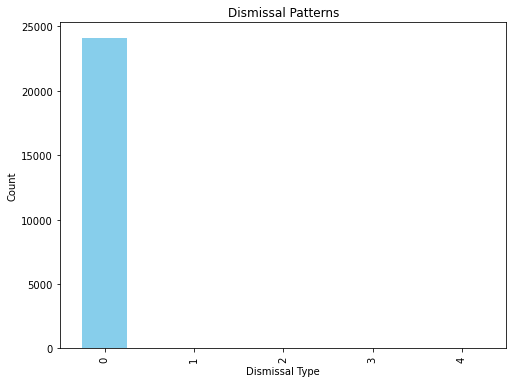

In [42]:
# Analyzing Dismissal Pattern
dismissal_counts = df['dismissed'].value_counts()
plt.figure(figsize=(8, 6))
dismissal_counts.plot(kind='bar', color='skyblue')
plt.title('Dismissal Patterns')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.show()

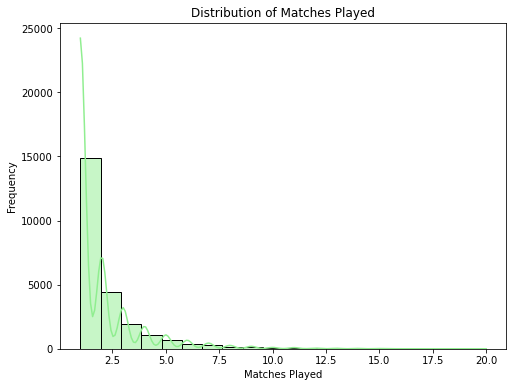

In [43]:
# Analyzing match played distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['match_played'], bins=20, color='lightgreen', kde=True)
plt.title('Distribution of Matches Played')
plt.xlabel('Matches Played')
plt.ylabel('Frequency')
plt.show()

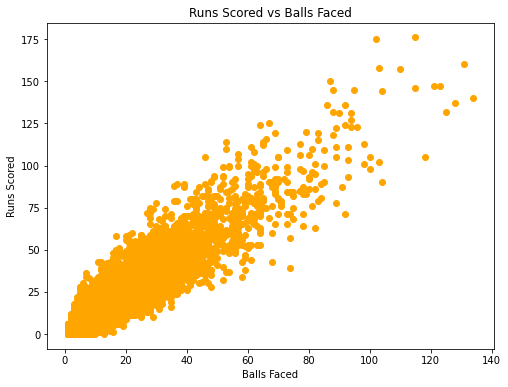

In [45]:
#Visualizing runs scored vs Balls faced
plt.figure(figsize=(8, 6))
plt.scatter(df['ball_faced'], df['runs_scored'], color='orange')
plt.title('Runs Scored vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.show()

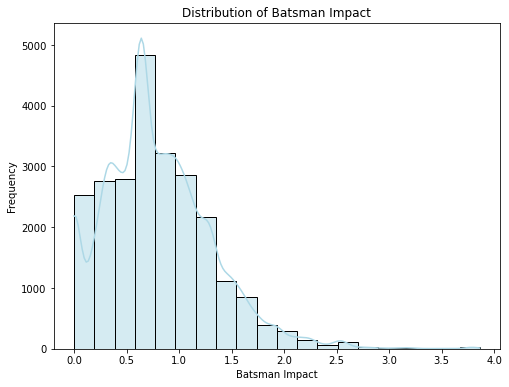

In [48]:
#Analyzing Batsmen Impact Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['batsman_impact'], bins=20, color='lightblue', kde=True)
plt.title('Distribution of Batsman Impact')
plt.xlabel('Batsman Impact')
plt.ylabel('Frequency')
plt.show()